In [1]:
# imports
from astropy.io import fits
import numpy as np
import glob, os, sys, time
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage.measurements import center_of_mass
from scipy.optimize import minimize_scalar
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.interpolate import UnivariateSpline
from photutils import CircularAperture
from photutils import aperture_photometry
from photutils import CircularAnnulus
import batman
from tabulate import tabulate
from IPython.display import HTML
import emcee
import corner

# Custom imports
sys.path.insert(0, '{}/PhD/code/mySpitzerTransit/'.format(os.getenv('HOME')))
from timeseries_routines import *
from transitFitting_routines import *
sys.path.insert(1, '{}/PhD/code/'.format(os.getenv('HOME')))
from ProgressBar import *

print "this is the eclipse development version"

# Read in the planet information from a text file
planetinFile = '/Users/cbaxter/PhD/SpitzerData/Kepler9b/Kepler9b.txt'
pipelineinFile = '/Users/cbaxter/PhD/SpitzerData/Kepler9b/pipelineParams_Kepler9b.txt'
foldext = '/circ_fixainct0_bin'

inputData = np.genfromtxt(planetinFile, dtype=None, delimiter=': ', comments='#', encoding = None)
planet = inputData[0][1]
AORs = inputData[1][1].split(', ')
channels = inputData[2][1].split(', ')
eclipses = inputData[3][1].split(', ')
t0s = inputData[4][1].split(', ')
cutstarts = [float(x) for x in inputData[5][1].split(', ')]
cutends = [float(x) for x in inputData[6][1].split(', ')]
posGuess = [float(x) for x in inputData[7][1].split(', ')]
T0_bjd = float(inputData[int(np.where(inputData.T[0]=='T0_BJD')[0])][1]) - 2400000.5
period = float(inputData[int(np.where(inputData.T[0]=='per')[0])][1])

ldlaw = inputData[int(np.where(inputData.T[0]=='limb_dark')[0])][1]
if foldext == 'None':
    foldext = ''
else:
    pass

PP = np.genfromtxt(pipelineinFile, dtype = None, skip_header = 1, delimiter = ', ', comments = '#', encoding = None)

ldlaw = inputData[int(np.where(inputData.T[0]=='limb_dark')[0])][1]


this is the eclipse development version



Interpolating linear limb darkening coefficients for ch1...
	 Coeff(s): [0.2024492]
	 Coeff Err(s): [0.00231649]
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47043072/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Masking bad pixels at 4 sigma...
	 36428 out of 13107200 bad pixels masked (0.278%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discarding passenger 57...
	 200 passenger 57 frames discarded
	 450 frames discarded from beginning of observation
	 0 frames discarded from end of observation

 Centroiding using Barycenter method...
	 Using boxsize 3...


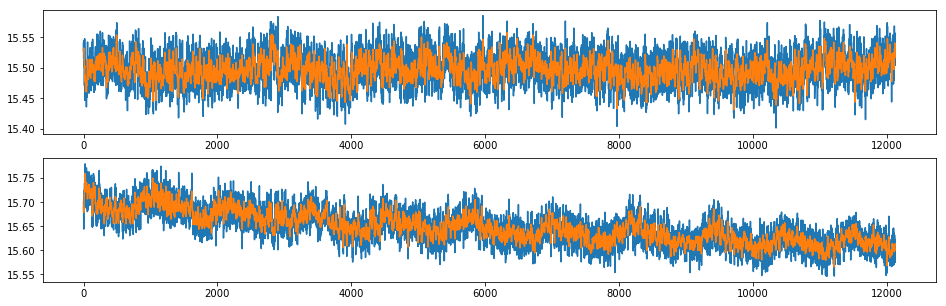

(12121, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 10 frames in iteration 1


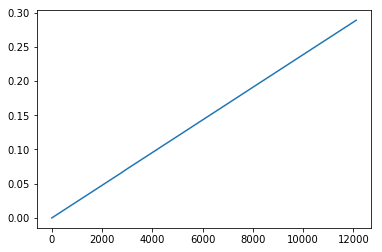

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.14342329232022166, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47043072/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Masking bad pixels at 4 sigma...
	 36428 out of 13107200 bad pixels masked (0.278%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discarding passen

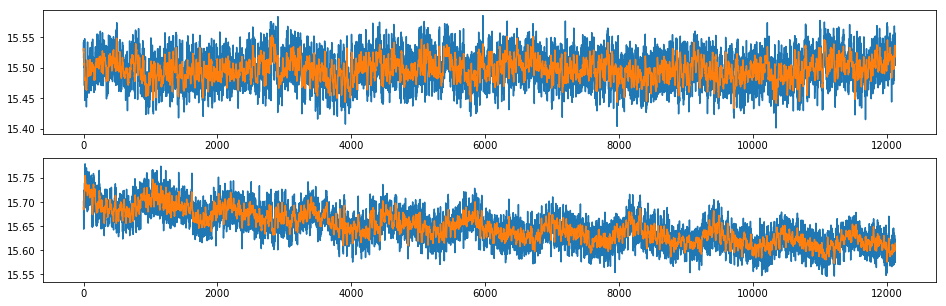

(12121, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 10 frames in iteration 1


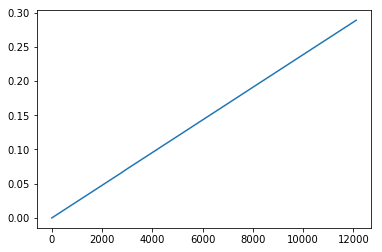

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.14342329232022166, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch1...
	 Coeff(s): [0.2024492]
	 Coeff Err(s): [0.00231649]
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47043584/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion fac

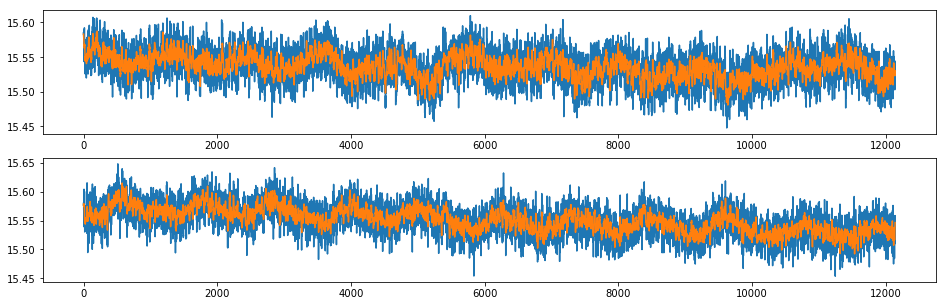

(12141, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


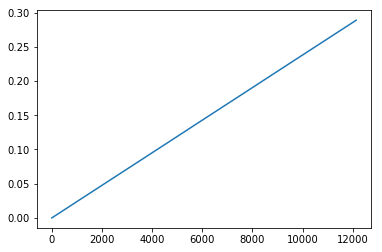

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.13095469260588288, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47043584/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Masking bad pixels at 4 sigma...
	 35085 out of 13107200 bad pixels masked (0.268%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discarding passen

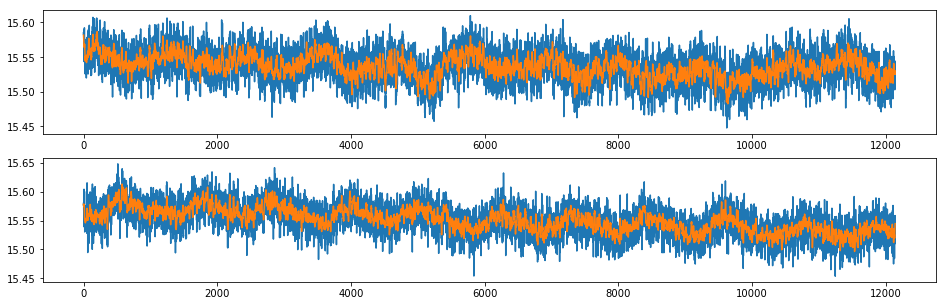

(12141, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


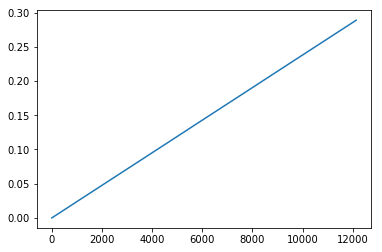

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.13095469260588288, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch1...
	 Coeff(s): [0.2024492]
	 Coeff Err(s): [0.00231649]
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47044352/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion fac

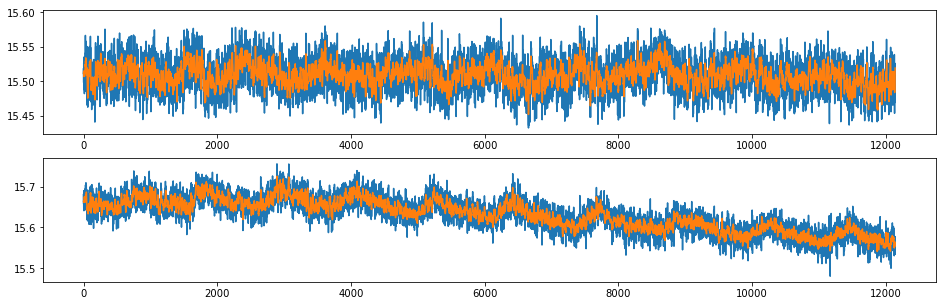

(12140, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


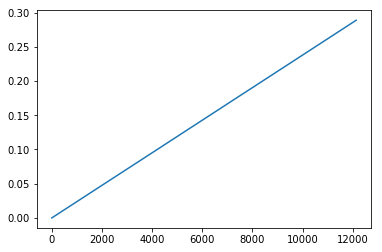

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.12927639251574874, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47044352/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Masking bad pixels at 4 sigma...
	 32229 out of 13107200 bad pixels masked (0.246%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discarding passen

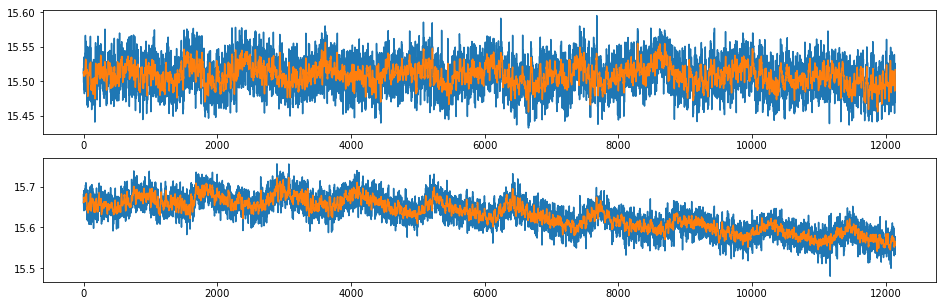

(12140, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


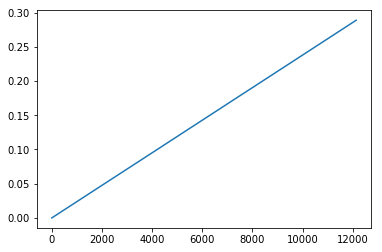

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.12927639251574874, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch1...
	 Coeff(s): [0.2024492]
	 Coeff Err(s): [0.00231649]
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47044608/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion fac

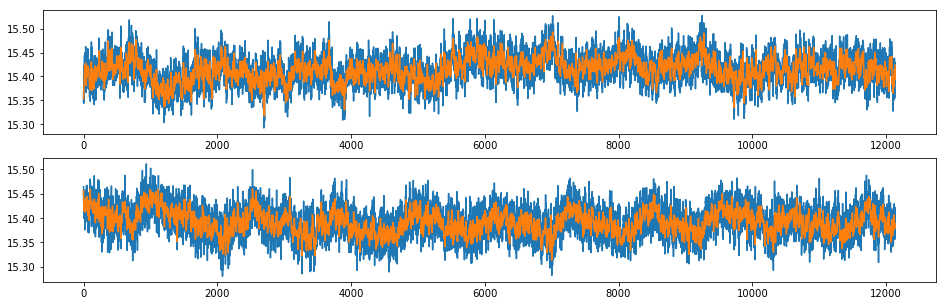

(12137, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


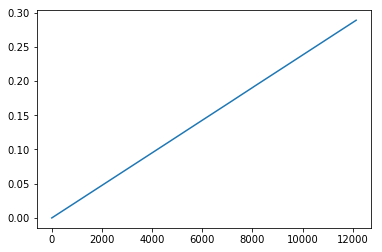

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.16857169242575765, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47044608/ch1/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 10.8, Gain = 3.7, Fluxconv = 0.1257, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 56.5155131265

Masking bad pixels at 4 sigma...
	 32945 out of 13107200 bad pixels masked (0.251%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discarding passen

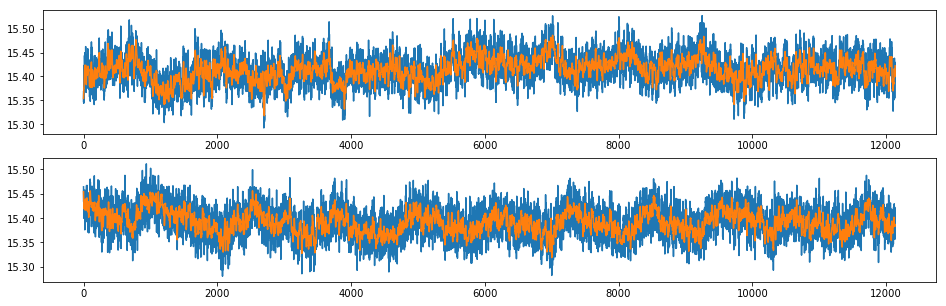

(12137, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 3 frames in iteration 1


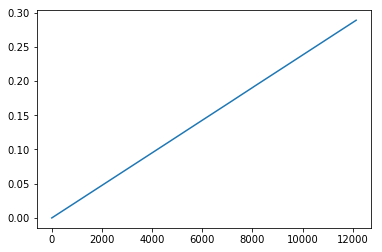

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.2024492], 't0': 0.16857169242575765, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch2...
	 Coeff(s): [0.1767036]
	 Coeff Err(s): [0.00139445]
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054336/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion fac

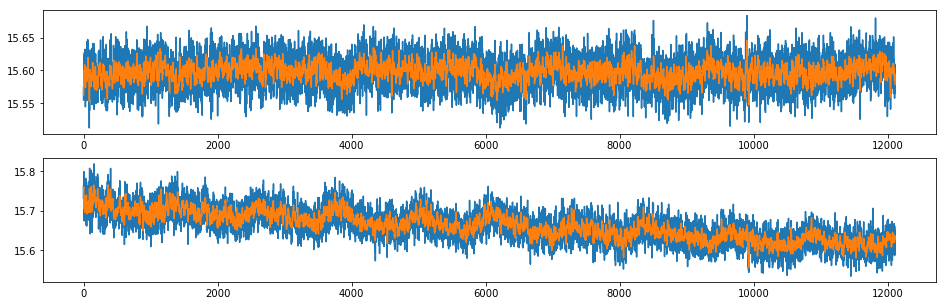

(12114, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 1 frames in iteration 1


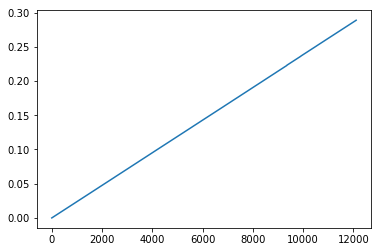

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.13070849236100912, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054336/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Masking bad pixels at 4 sigma...
	 6092 out of 13107200 bad pixels masked (0.046%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discardi

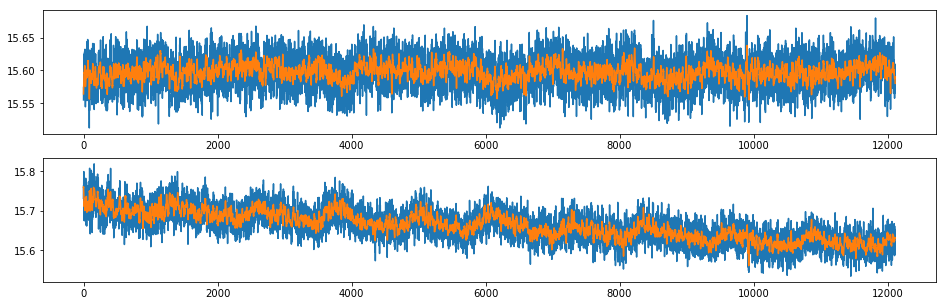

(12114, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 1 frames in iteration 1


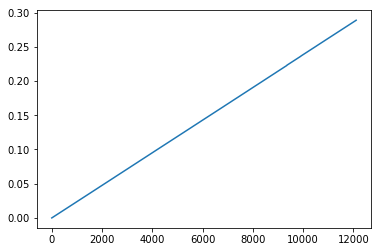

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.13070849236100912, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch2...
	 Coeff(s): [0.1767036]
	 Coeff Err(s): [0.00139445]
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054592/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conv

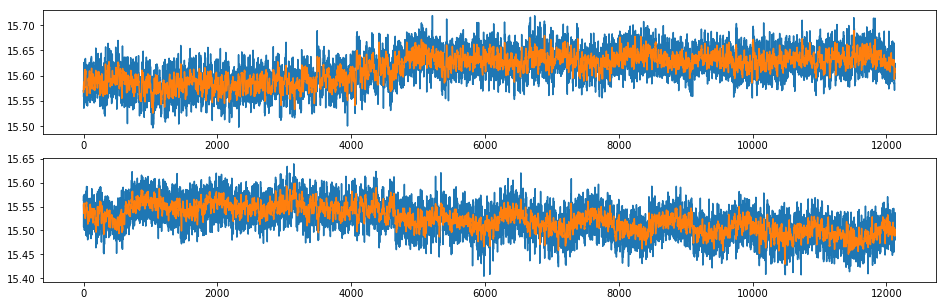

(12131, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


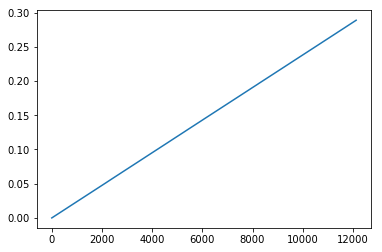

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.11895619239658117, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054592/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Masking bad pixels at 4 sigma...
	 7731 out of 13107200 bad pixels masked (0.059%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discardi

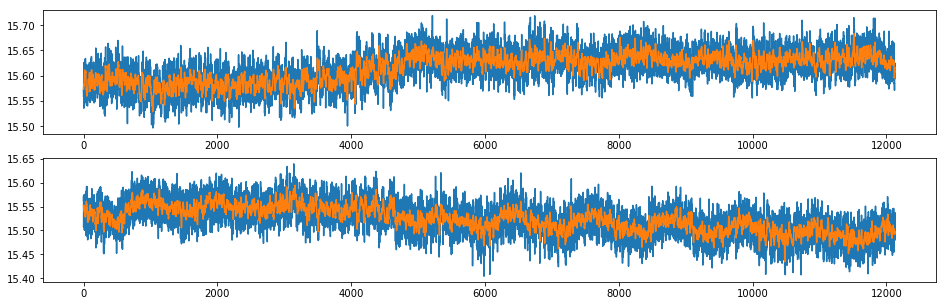

(12131, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


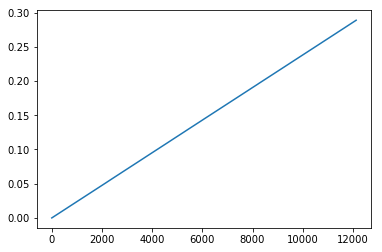

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.11895619239658117, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch2...
	 Coeff(s): [0.1767036]
	 Coeff Err(s): [0.00139445]
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054848/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conv

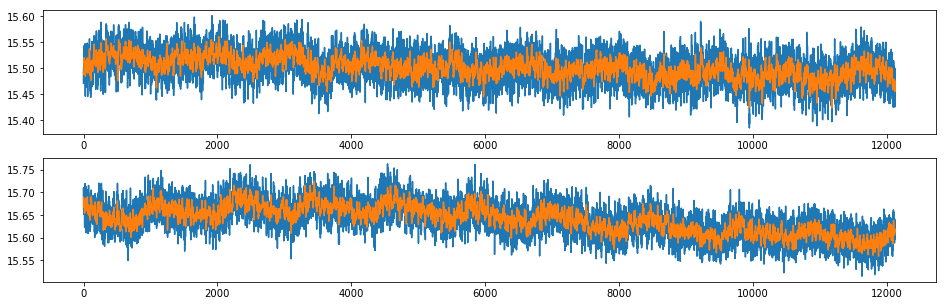

(12125, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


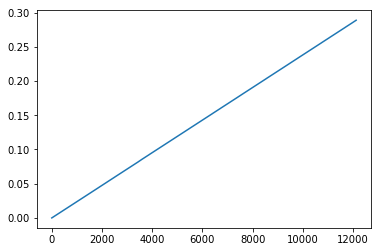

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.12478349218145013, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47054848/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Masking bad pixels at 4 sigma...
	 5365 out of 13107200 bad pixels masked (0.041%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discardi

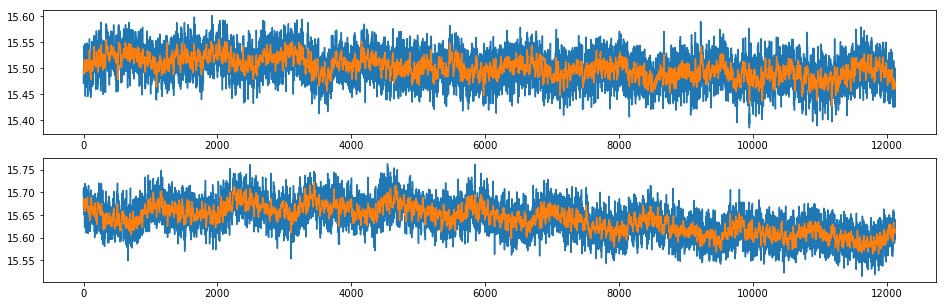

(12125, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


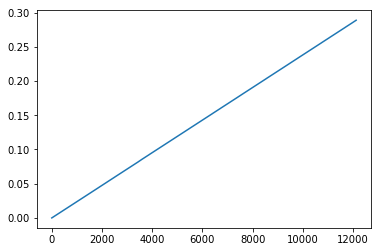

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.12478349218145013, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Interpolating linear limb darkening coefficients for ch2...
	 Coeff(s): [0.1767036]
	 Coeff Err(s): [0.00139445]
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47055104/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conv

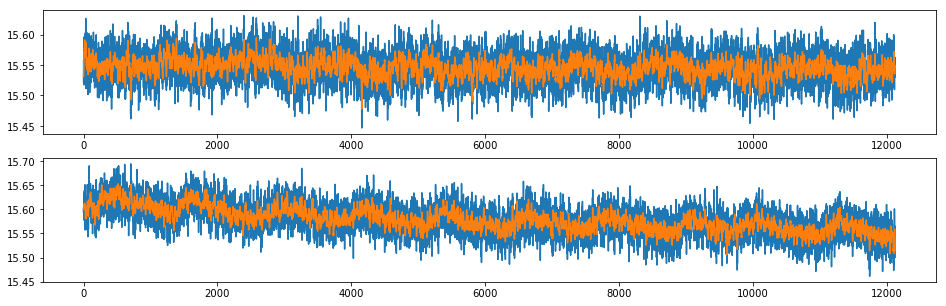

(12128, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


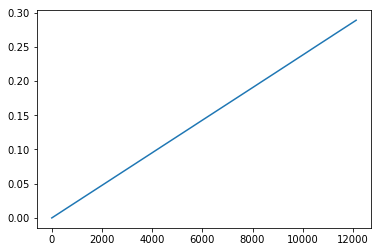

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.17242539254948497, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']

Reading data from '/Users/cbaxter/PhD/SpitzerData/Kepler9b/r47055104/ch2/bcd/' ... 
	 Timeseries created with shape (12800, 32, 32)
	 Midtimes created with shape (12800,)
	 Exptime = 1.92, Readnoise = 9.4, Gain = 3.71, Fluxconv = 0.1447, Framtime = 2.0
	 MJy/sr to electrons conversion factor = 49.2273669661

Masking bad pixels at 4 sigma...
	 10691 out of 13107200 bad pixels masked (0.082%)

Subtracting background...
	 Background subtracted using Box method with size 4

Discarding ramp at beginning of observations and discard

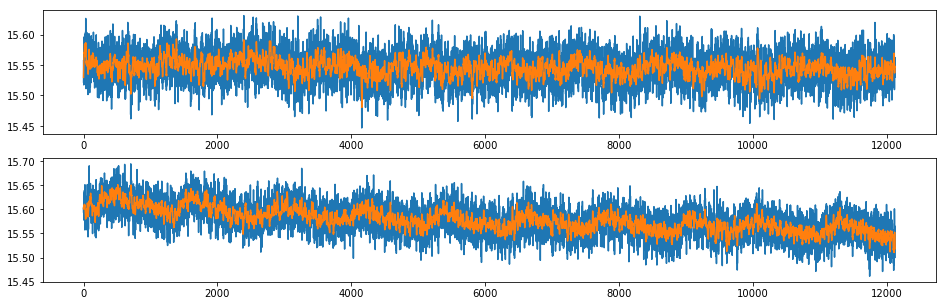

(12128, 2)

Performing aperture photometry...
	 Using radius of 2.5 pixels.
	 Success

Clipping frames >5 sigma away from median photometry...
	 Clipped 0 frames in iteration 1


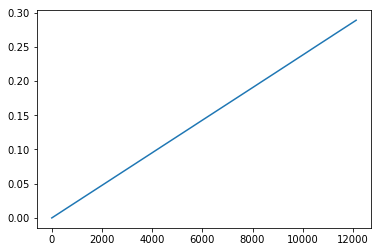

[u'2456670.60793', u'2456632.10341', u'2456535.89162', u'2456478.19597', u'2456863.30227', u'2456651.35017', u'2456555.13023', u'2456516.65905']
{'a': 27.38, 'ecc': 0.0, 'K5': 0.0, 'g': 0.001, 'f': 1.0, 'h': 0.0, 'limb_dark': u'linear', 'per': 19.2372, 'K3': 0.1, 'K2': 0.1, 'K1': 0.1, 'u': [0.17670360000000002], 't0': 0.17242539254948497, 'w': 0.0, 'K4': 0.1, 'rp': 0.07885, 'inc': 88.55}
[u't0', u'a', u'inc', u'u', u'per', u'ecc', u'w', u'limb_dark', u'K5', u'h']


In [2]:

for m in range(len(AORs)):
    if 'E' in eclipses[m]:
        eclipse = True
    else:
        eclipse = False

    star_params = {'Teff':0,'logg':0,'z':0,'Tefferr':0,'loggerr':0,'zerr':0}
    for key in star_params:
        star_params[key] = float(inputData[int(np.where(inputData.T[0]==key)[0])][1])

    # Create a dictionary of the polynomial parameters...
    if eclipse:
        coeffs_tuple_poly = ('t_secondary', 'fp', 'per', 'rp', 'a', 'inc', 'ecc', 'w', 'u', 'limb_dark',
                       'K1', 'K2', 'K3', 'K4', 'K5',
                       'f', 'g', 'h')
        fix_coeffs_poly = inputData[int(np.where(inputData.T[0]=='fixcoeffs_poly_E')[0])][1].split(', ')
    else:
        coeffs_tuple_poly = ('t0', 'per', 'rp', 'a', 'inc', 'ecc', 'w', 'u', 'limb_dark',
                       'K1', 'K2', 'K3', 'K4', 'K5',
                       'f', 'g', 'h')
        fix_coeffs_poly = inputData[int(np.where(inputData.T[0]=='fixcoeffs_poly')[0])][1].split(', ')

    coeffs_dict_poly = dict()
    for label in coeffs_tuple_poly:
        if label != 'u' and label != 't_secondary' and label != 't0':
            try:
                coeffs_dict_poly[label] = float(inputData[int(np.where(inputData.T[0]==label)[0])][1].split(', ')[m])
            except:
                try: # If there is nothing to split
                    coeffs_dict_poly[label] = float(inputData[int(np.where(inputData.T[0]==label)[0])][1])
                except: # the limb darkening law
                    coeffs_dict_poly[label] = inputData[int(np.where(inputData.T[0]==label)[0])][1]

    # Create a dictionary of the PLD paramters...
    if eclipse:
        coeffs_tuple_PLD = ('t_secondary', 'fp','per', 'rp', 'a', 'inc', 'ecc', 'w', 'u', 'limb_dark',
                       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
                       'g', 'h')
        fix_coeffs_PLD = inputData[int(np.where(inputData.T[0]=='fixcoeffs_PLD_E')[0])][1].split(', ')
    else:
        coeffs_tuple_PLD = ('t0', 'per', 'rp', 'a', 'inc', 'ecc', 'w', 'u', 'limb_dark',
                       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
                       'g', 'h')
        fix_coeffs_PLD = inputData[int(np.where(inputData.T[0]=='fixcoeffs_PLD')[0])][1].split(', ')

    coeffs_dict_PLD = dict()
    for label in coeffs_tuple_PLD:
        if label != 'u' and label != 't_secondary' and label != 't0':
            try:
                coeffs_dict_PLD[label] = float(inputData[int(np.where(inputData.T[0]==label)[0])][1].split(', ')[m])
            except:
                try: # If there is nothing to split
                    coeffs_dict_PLD[label] = float(inputData[int(np.where(inputData.T[0]==label)[0])][1])
                except: # the limb darkening law
                    coeffs_dict_PLD[label] = inputData[int(np.where(inputData.T[0]==label)[0])][1]

    AOR = AORs[m]
    channel = channels[m]

    # Get the interpolated limb darkening coefficients
    ldcoeffs, ldcoeffs_err = getldcoeffs(star_params['Teff'],star_params['logg'],star_params['z'],
                                         star_params['Tefferr'],star_params['loggerr'],star_params['zerr'],
                                         law = ldlaw, channel = channel)

    if np.nan not in ldcoeffs:
        coeffs_dict_poly['u'], coeffs_dict_PLD['u'] = ldcoeffs, ldcoeffs # Must be list!
    else:
        coeffs_dict_poly['u'] = [float(inputData[int(np.where(inputData.T[0]=='u')[0])][1].split('\ ')[m])]
        coeffs_dict_PLD['u'] = [float(inputData[int(np.where(inputData.T[0]=='u')[0])][1].split('\ ')[m])]
        ldcoeffs_err = [float(inputData[int(np.where(inputData.T[0]=='u_err')[0])][1].split('\ ')[m])]

    #coeffs_dict_poly['t0'], coeffs_dict_PLD['t0'] = float(t0s[m]), float(t0s[m])
    # Path to get the data
    path = "{3}/PhD/SpitzerData/{0}/{1}/{2}/bcd/".format(planet,AOR,channel, os.getenv('HOME'))

    # Read in the data
    data_info = read_files(path)
    exptime = data_info.exptime()
    readnoise = data_info.readnoise()
    gain = data_info.gain()
    fluxconv = data_info.fluxconv()
    framtime = data_info.framtime()
    MJysr2lelectrons = exptime*gain/fluxconv

    print "\t Exptime = {}, Readnoise = {}, Gain = {}, Fluxconv = {}, Framtime = {}".format(exptime, readnoise, gain, fluxconv, framtime)
    print "\t MJy/sr to electrons conversion factor = {}".format(MJysr2lelectrons)

    bkg_method = "Box"
    bkg_boxsize = 4
    bkg_annradius = None
    bkg_annsize = None
    cent_method = "Barycenter"
    cent_sizebary = 3
    photom_radius = 2.5

    datapath = "{3}/PhD/SpitzerData/{0}/{1}/{2}/bcd/".format(planet,AOR,channel, os.getenv('HOME'))
    widths = [6,8]

    for width in widths:
        # If the AOR is the same as the one before do not run the pipeline again (deleted)
        lightcurve_red, timeseries_red, centroids_red, midtimes_red, background_red = runFullPipeline(datapath, 4, 30,
                       method_bkg = bkg_method, method_cent = cent_method, plotting_binsize=50,
                       ramp_time = cutstarts[m]*60, end_time = cutends[m]*60,
                       x0guess = posGuess[0], y0guess = posGuess[1],
                       sigma_clip_cent = 4, iters_cent = 2, nframes_cent=30,
                       radius_photom = photom_radius,
                       sigma_clip_phot = 4, iters_photom = 2, nframes_photom=30,
                       size_bkg_box = bkg_boxsize, radius_bkg_ann = bkg_annradius, size_bkg_ann = bkg_annsize,
                       size_cent_bary = cent_sizebary, passenger57 = True,
                       quiet = False, plot = True, AOR = AOR, planet = planet, channel = channel, foldext=foldext, 
                       smoothingwidth = width)

        lc = lightcurve_red
        lcerr = np.sqrt(lc)
        scale = np.median(lc[:100]) # Guess initial scale
        lc, lcerr = lc/scale, lcerr/scale
        x, y = centroids_red[:,1], centroids_red[:,0]
        t = (midtimes_red - midtimes_red[0])

        plt.plot(t)
        plt.show()
        if (planet == 'Wasp13b') and (channel == 'ch1'):
            ind0 = find_nearest(t,0.190)
            ind1 = find_nearest(t,0.215)

            #Try cutting out the data
            lc = np.delete(lc, np.arange(ind0,ind1,1), axis = 0)
            lcerr = np.delete(lcerr, np.arange(ind0,ind1,1), axis = 0)
            x = np.delete(x, np.arange(ind0,ind1,1), axis = 0)
            y = np.delete(y, np.arange(ind0,ind1,1), axis = 0)
            t = np.delete(t, np.arange(ind0,ind1,1), axis = 0)
            timeseries_red = np.delete(timeseries_red, np.arange(ind0,ind1,1), axis = 0)
            centroids_red = np.delete(centroids_red, np.arange(ind0,ind1,1), axis = 0)
            background_red = np.delete(background_red, np.arange(ind0,ind1,1), axis = 0)

            # Try giving large errorbars to the data
            #lcerr[ind0:ind1] = 1e6*lcerr[ind0:ind1]
        else:
            pass

        if eclipse:
            N_orbits = np.floor((midtimes_red[0] - T0_bjd)/period)
            ET_bjd = T0_bjd + period*(N_orbits+0.5)
            TT_bjd = T0_bjd + period*(N_orbits)
            t = midtimes_red - midtimes_red[0]
            #coeffs_dict_poly['t_secondary'], coeffs_dict_PLD['t_secondary'] = ET_bjd - midtimes_red[0], ET_bjd- midtimes_red[0]#float(t0s[m]), float(t0s[m])
            #coeffs_dict_poly['t0'], coeffs_dict_PLD['t0'] = TT_bjd- midtimes_red[0], TT_bjd- midtimes_red[0]
            coeffs_dict_poly['t_secondary'], coeffs_dict_PLD['t_secondary'] = float(t0s[m]), float(t0s[m])
        else:
            print t0s
            if float(t0s[0]) > 10.:
                coeffs_dict_poly['t0'], coeffs_dict_PLD['t0'] = float(t0s[m])-midtimes_red[0] - 2400000.5, float(t0s[m])-midtimes_red[0]- 2400000.5
            else:
                coeffs_dict_poly['t0'], coeffs_dict_PLD['t0'] = float(t0s[m]), float(t0s[m])
        #POLYNOMIAL

        print coeffs_dict_poly
        print fix_coeffs_poly

        result, batman_params_poly, poly_params = fit_function_poly(coeffs_dict_poly, coeffs_tuple_poly, fix_coeffs_poly, t, x, y, lc, eclipse = eclipse)
        popt = result.x
        labels_poly = [ key for key in coeffs_tuple_poly if key not in fix_coeffs_poly ]
        plot_lightcurve(t,  lc, lcerr, popt, coeffs_dict_poly, coeffs_tuple_poly, fix_coeffs_poly, batman_params_poly, poly_params,
                            x=x,y=y, errors = False, binsize = 70,
                            name = planet, channel = channel, orbit = AOR, savefile = True, TT_hjd = None,
                            method = "poly", color = 'b', scale = scale, filext = "smoothing_test_width{}".format(width), foldext=foldext, eclipse = eclipse)

        #PLD
        result_PLD, batman_params_PLD, PLD_params, Pns = fit_function_PLD(coeffs_dict_PLD, coeffs_tuple_PLD, fix_coeffs_PLD, t, timeseries_red, centroids_red, lc, eclipse = eclipse)
        popt_PLD = result_PLD.x
        labels_PLD = [ key for key in coeffs_tuple_PLD if key not in fix_coeffs_PLD ]
        plot_lightcurve(t,  lc, lcerr, popt_PLD, coeffs_dict_PLD, coeffs_tuple_PLD, fix_coeffs_PLD, batman_params_PLD, PLD_params,
                            Pns = Pns, errors = False, binsize = 70,
                            name = planet, channel = channel, orbit=AOR, savefile = True, TT_hjd = None,
                            method = "PLD", color = "r", scale = scale, filext = "smoothing_test_width{}".format(width), foldext=foldext, eclipse = eclipse)

